In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import os


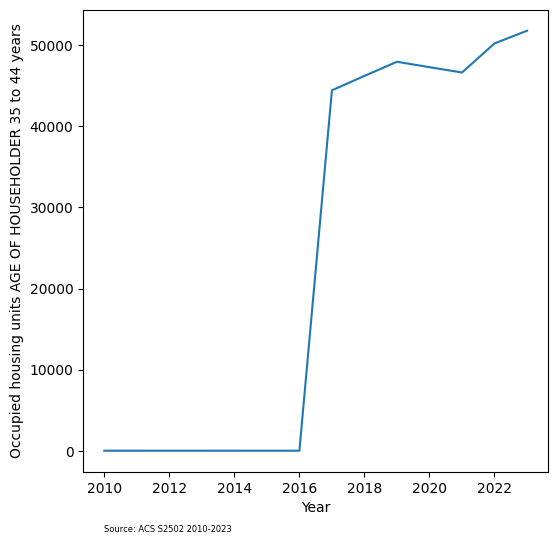

In [110]:


def load_data(file_path):
    """Loads the dataset and extracts relevant columns for age of householder."""
    df = pd.read_csv(file_path)
    df = df.iloc[1:]  # Remove the first row which contains metadata
    age_columns = [col for col in df.columns if "AGE OF HOUSEHOLDER" in str(df.iloc[0].values)]
    if not age_columns:
        return None  # Return None if no relevant columns found
    df = df.set_index(df.columns[0])  # Set first column as index to avoid conversion issues
    age_data = df[age_columns].astype(float)
    if len(age_data.columns) >= 2:
        age_data.columns = ["Under 35", "35-44"] + age_data.columns[2:].tolist()  # Custom x-axis labels, keeping only relevant ones
    return age_data.iloc[0][["Under 35", "35-44"]]  # Return only selected age groups

# Directory containing files (update this with actual path if running locally)
data_directory = "/Users/evan/MIT/c85/FP1/productDownload_2025-03-17T123140"  # Change this to the correct path


# Find all relevant files
files = [f for f in os.listdir(data_directory) if f.endswith("-Data.csv")]

# Dictionary to store age data for each year
df_dict = {}
year_list = []
pop_list = []

for file in files:
    year = file.split("Y")[1][:4]  # Extract year from filename
    
    file_path = os.path.join(data_directory, file)
    
    df = pd.read_csv(file_path)
    a = df["S2502_C01_012E"]
    age_data = a.iloc[1]

    df_dict[int(year)] = float(age_data)
    #df_dict[year] = age_data
    year_list.append(year)
    pop_list.append(age_data)



sorted_df_dict = dict(sorted(df_dict.items()))
years = list(sorted_df_dict.keys())
values = list(sorted_df_dict.values())


plt.figure(figsize=(6, 6))
plt.plot(years,values)
plt.xlabel('Year')
plt.ylabel('Occupied housing units AGE OF HOUSEHOLDER 35 to 44 years')

plt.text(2010, -10000, "Source: ACS S2502 2010-2023", fontsize=6)

plt.show()


In [111]:

# Directory containing files (update this if running locally)
data_directory = "/Users/evan/MIT/c85/FP1/productDownload_2025-03-17T123140"  # Update path as needed

# Find all relevant files
files = [f for f in os.listdir(data_directory) if f.endswith("-Data.csv")]

# Dictionary to store age data for each year
df_dict = {}
year_list = []
pop_data = {label: [] for label in ["Under 35", "35-44", "45-54", "55-64", "65-74", "75-84","85 and over"]}

for file in files:
    year = file.split("Y")[1][:4]  # Extract year from filename
    
    file_path = os.path.join(data_directory, file)
    
    df = pd.read_csv(file_path)
    age_columns = ["S2502_C01_011E","S2502_C01_012E","S2502_C01_013E","S2502_C01_014E","S2502_C01_015E","S2502_C01_016E","S2502_C01_017E"]
    age_data = df[age_columns].iloc[1]
    # Set more comprehensive labels
    age_labels = ["Under 35", "35-44", "45-54", "55-64", "65-74", "75-84","85 and over"]
    
    



In [112]:
df = pd.read_csv(file_path)
#df = df.iloc[1:]  # Remove the first row which contains metadata
df.columns

#age_columns = [col for col in df.columns if "AGE OF HOUSEHOLDER" in str(df.iloc[0].values)]
age_columns = ["S2502_C01_011E","S2502_C01_012E","S2502_C01_013E","S2502_C01_014E","S2502_C01_015E","S2502_C01_016E","S2502_C01_017E"]
age_data = df[age_columns].iloc[1]

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing files (update this if running locally)
data_directory = "/Users/evan/MIT/c85/FP1/productDownload_2025-03-17T123140"  # Update path as needed

# Find all relevant files
files = [f for f in os.listdir(data_directory) if f.endswith("-Data.csv")]

# Dictionary to store age data for each year
df_dict = {}
year_list = []
pop_data = {label: [] for label in ["Under 35", "35-44", "45-54", "55-64", "65-74", "75-84", "85 and over"]}

# Define the age-related column names
age_columns = ["S2502_C01_011E", "S2502_C01_012E", "S2502_C01_013E", "S2502_C01_014E", 
               "S2502_C01_015E", "S2502_C01_016E", "S2502_C01_017E"]
age_labels = ["Under 35", "35-44", "45-54", "55-64", "65-74", "75-84", "85 and over"]

for file in files:
    year = file.split("Y")[1][:4]  # Extract year from filename
    #print(year)
    
    file_path = os.path.join(data_directory, file)
    
    df = pd.read_csv(file_path)
    

    # Extract and convert age data to numeric format
    age_data = df[age_columns].iloc[1].astype(float)
    #print(age_data)

    df_dict[int(year)] = age_data.to_dict()
    year_list.append(int(year))

    #for label, value in zip(age_labels, age_data):
    #    pop_data[label].append(value)


# Sorting years for consistency
sorted_years = sorted(year_list)
"""

# Plot data for each age group
plt.figure(figsize=(10, 6))
for age_group, values in pop_data.items():
    plt.plot(sorted_years, values, label=age_group)

plt.xlabel('Year')
plt.ylabel('Occupied Housing Units')
plt.title('Age of Householder Over Time')
plt.legend()
plt.grid(True)

plt.text(2010, min(min(pop_data.values())), "Source: ACS S2502 2010-2023", fontsize=6)

plt.show()
"""


'\n\n# Plot data for each age group\nplt.figure(figsize=(10, 6))\nfor age_group, values in pop_data.items():\n    plt.plot(sorted_years, values, label=age_group)\n\nplt.xlabel(\'Year\')\nplt.ylabel(\'Occupied Housing Units\')\nplt.title(\'Age of Householder Over Time\')\nplt.legend()\nplt.grid(True)\n\nplt.text(2010, min(min(pop_data.values())), "Source: ACS S2502 2010-2023", fontsize=6)\n\nplt.show()\n'

In [114]:
#df_dict[2021]['S2502_C01_011E']
#len(df_dict)
age1 = []
age2 = []
age3 = []
age4 = []
age5 = []
age6 = []
age7 = []


for i in range(len(df_dict)):
    temp_year = years[i]
    temp_dict = df_dict[temp_year]
    age1.append(temp_dict[age_columns[0]])
    age2.append(temp_dict[age_columns[1]])
    age3.append(temp_dict[age_columns[2]])
    age4.append(temp_dict[age_columns[3]])
    age5.append(temp_dict[age_columns[4]])
    age6.append(temp_dict[age_columns[5]])
    age7.append(temp_dict[age_columns[6]])


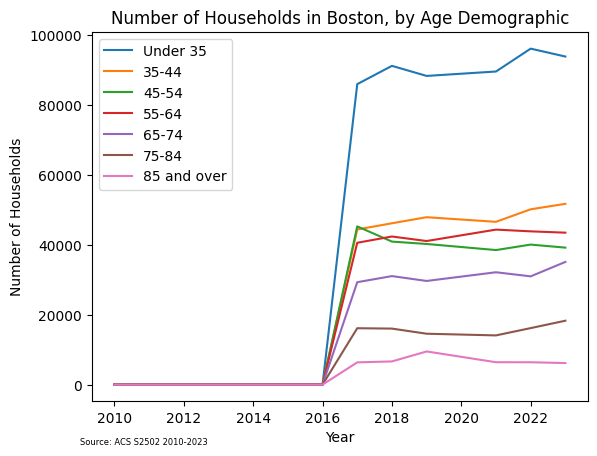

In [116]:
plt.plot(years,age1,label = age_labels[0])
plt.plot(years,age2,label = age_labels[1])
plt.plot(years,age3,label = age_labels[2])
plt.plot(years,age4,label = age_labels[3])
plt.plot(years,age5,label = age_labels[4])
plt.plot(years,age6,label = age_labels[5])
plt.plot(years,age7,label = age_labels[6])
plt.xlabel('Year')
plt.ylabel("Number of Households")
plt.text(2009, -17000, "Source: ACS S2502 2010-2023", fontsize=6)
plt.title("Number of Households in Boston, by Age Demographic")
plt.legend()
plt.show()

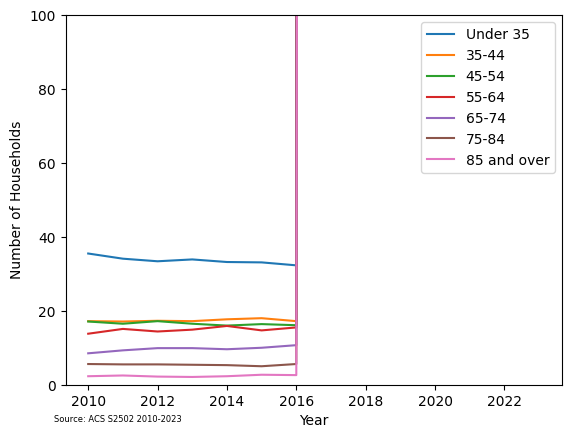

In [74]:
plt.plot(years,age1,label = age_labels[0])
plt.plot(years,age2,label = age_labels[1])
plt.plot(years,age3,label = age_labels[2])
plt.plot(years,age4,label = age_labels[3])
plt.plot(years,age5,label = age_labels[4])
plt.plot(years,age6,label = age_labels[5])
plt.plot(years,age7,label = age_labels[6])
plt.xlabel('Year')
plt.ylabel("Number of Households")
plt.ylim([0,100])
plt.text(2009, -10, "Source: ACS S2502 2010-2023", fontsize=6)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing files (update this if running locally)
data_directory = "/Users/evan/MIT/c85/FP1/productDownload_2025-03-17T123140"  # Update path as needed

# Find all relevant files
files = [f for f in os.listdir(data_directory) if f.endswith("-Data.csv")]

# Dictionary to store age data for each year
df_dict = {}
year_list = []
pop_data = {label: [] for label in ["Under 35", "35-44", "45-54", "55-64", "65-74", "75-84", "85 and over"]}

# Define the age-related column names
age_columns = ["S2502_C06_011E", "S2502_C06_012E", "S2502_C06_013E", "S2502_C06_014E", 
               "S2502_C06_015E", "S2502_C06_016E", "S2502_C06_017E"]
age_labels = ["Under 35", "35-44", "45-54", "55-64", "65-74", "75-84", "85 and over"]

for file in files:
    year = file.split("Y")[1][:4]  # Extract year from filename
    #print(year)
    
    if int(year) > 2016:
        #the data before 2016 does not have info
        file_path = os.path.join(data_directory, file)
        
        df = pd.read_csv(file_path)
        

        # Extract and convert age data to numeric format
        age_data = df[age_columns].iloc[1].astype(float)
        #print(age_data)

        df_dict[int(year)] = age_data.to_dict()
        year_list.append(int(year))

    #for label, value in zip(age_labels, age_data):
    #    pop_data[label].append(value)


# Sorting years for consistency
sorted_years = sorted(year_list)



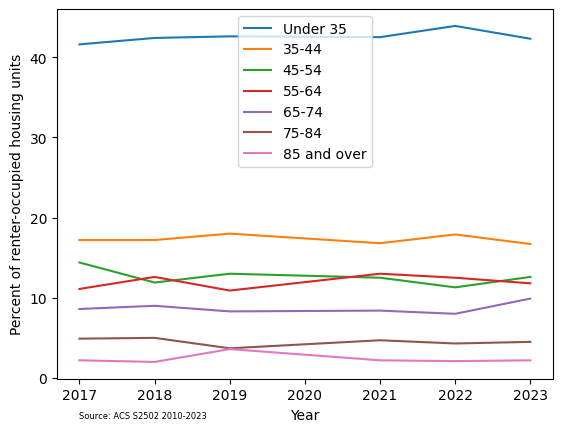

In [107]:
#df_dict[2021]['S2502_C01_011E']
#len(df_dict)
age1 = []
age2 = []
age3 = []
age4 = []
age5 = []
age6 = []
age7 = []

newyears = [2017,2018,2019,2021,2022,2023]

for i in range(len(df_dict)):
    temp_year = newyears[i]
    temp_dict = df_dict[temp_year]
    age1.append(temp_dict[age_columns[0]])
    age2.append(temp_dict[age_columns[1]])
    age3.append(temp_dict[age_columns[2]])
    age4.append(temp_dict[age_columns[3]])
    age5.append(temp_dict[age_columns[4]])
    age6.append(temp_dict[age_columns[5]])
    age7.append(temp_dict[age_columns[6]])


plt.plot(newyears,age1,label = age_labels[0])
plt.plot(newyears,age2,label = age_labels[1])
plt.plot(newyears,age3,label = age_labels[2])
plt.plot(newyears,age4,label = age_labels[3])
plt.plot(newyears,age5,label = age_labels[4])
plt.plot(newyears,age6,label = age_labels[5])
plt.plot(newyears,age7,label = age_labels[6])
plt.xlabel('Year')
plt.ylabel("Percent of renter-occupied housing units")
plt.text(2017, -5, "Source: ACS S2502 2010-2023", fontsize=6)
plt.legend()
plt.show()

In [103]:
df_dict

{2021: {'S2502_C06_011E': 42.5,
  'S2502_C06_012E': 16.8,
  'S2502_C06_013E': 12.5,
  'S2502_C06_014E': 13.0,
  'S2502_C06_015E': 8.4,
  'S2502_C06_016E': 4.7,
  'S2502_C06_017E': 2.2},
 2023: {'S2502_C06_011E': 42.3,
  'S2502_C06_012E': 16.7,
  'S2502_C06_013E': 12.6,
  'S2502_C06_014E': 11.8,
  'S2502_C06_015E': 9.9,
  'S2502_C06_016E': 4.5,
  'S2502_C06_017E': 2.2},
 2022: {'S2502_C06_011E': 43.9,
  'S2502_C06_012E': 17.9,
  'S2502_C06_013E': 11.3,
  'S2502_C06_014E': 12.5,
  'S2502_C06_015E': 8.0,
  'S2502_C06_016E': 4.3,
  'S2502_C06_017E': 2.1},
 2019: {'S2502_C06_011E': 42.6,
  'S2502_C06_012E': 18.0,
  'S2502_C06_013E': 13.0,
  'S2502_C06_014E': 10.9,
  'S2502_C06_015E': 8.3,
  'S2502_C06_016E': 3.7,
  'S2502_C06_017E': 3.6},
 2018: {'S2502_C06_011E': 42.4,
  'S2502_C06_012E': 17.2,
  'S2502_C06_013E': 11.9,
  'S2502_C06_014E': 12.6,
  'S2502_C06_015E': 9.0,
  'S2502_C06_016E': 5.0,
  'S2502_C06_017E': 2.0},
 2017: {'S2502_C06_011E': 41.6,
  'S2502_C06_012E': 17.2,
  'S2502_C06